In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import adfuller, acf, pacf
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tools.eval_measures import rmse, meanabs
from sklearn.metrics import mean_absolute_error, mean_squared_error
from statsmodels.tsa.holtwinters import ExponentialSmoothing
import warnings

In [2]:
Data = pd.read_csv("C:\\Users\\91755\\Desktop\\Excelr Assignments\\Timeseries\\Timeseries\\exchange_rate.csv")
Data

,date,Ex_rate
0,01-01-1990 00:00,0.785500
1,02-01-1990 00:00,0.781800
2,03-01-1990 00:00,0.786700
3,04-01-1990 00:00,0.786000
4,05-01-1990 00:00,0.784900
...,...,...
7583,06-10-2010 00:00,0.718494
7584,07-10-2010 00:00,0.721839
7585,08-10-2010 00:00,0.723197
7586,09-10-2010 00:00,0.720825


In [5]:
Data.head()

,date,Ex_rate
0,01-01-1990 00:00,0.7855
1,02-01-1990 00:00,0.7818
2,03-01-1990 00:00,0.7867
3,04-01-1990 00:00,0.7860
4,05-01-1990 00:00,0.7849


In [7]:
Data = Data.rename(columns={"Ex_rate": "Exchange_Rate"})
Data

,date,Exchange_Rate
0,01-01-1990 00:00,0.785500
1,02-01-1990 00:00,0.781800
2,03-01-1990 00:00,0.786700
3,04-01-1990 00:00,0.786000
4,05-01-1990 00:00,0.784900
...,...,...
7583,06-10-2010 00:00,0.718494
7584,07-10-2010 00:00,0.721839
7585,08-10-2010 00:00,0.723197
7586,09-10-2010 00:00,0.720825


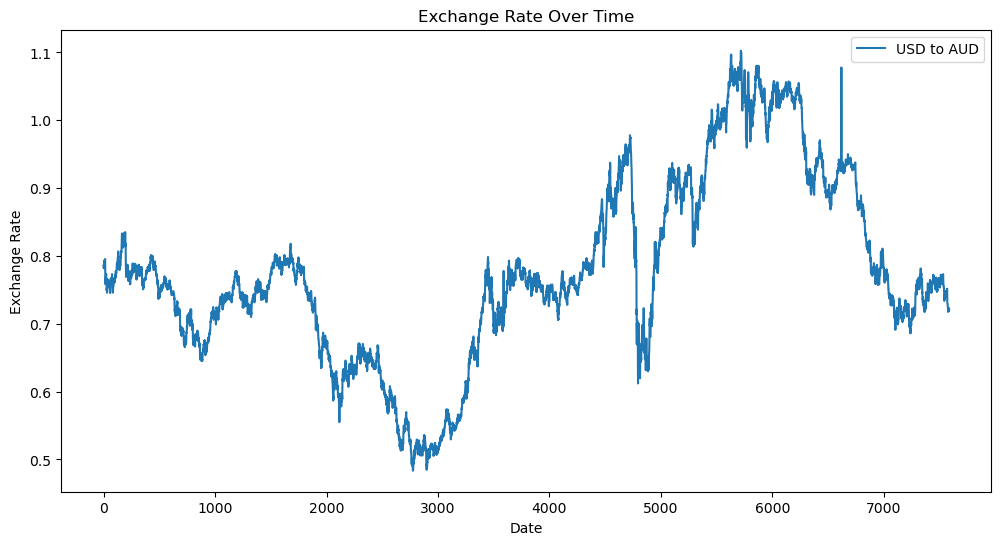

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(Data["Exchange_Rate"], label="USD to AUD")
plt.title("Exchange Rate Over Time")
plt.xlabel("Date")
plt.ylabel("Exchange Rate")
plt.legend()
plt.show()


In [15]:
Data.isnull().sum()

date             0
Exchange_Rate    0
dtype: int64

In [17]:
Data.fillna(method="ffill", inplace=True)
Data

C:\Users\91755\AppData\Local\Temp\ipykernel_21128\1959340805.py:1: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  Data.fillna(method="ffill", inplace=True)


,date,Exchange_Rate
0,01-01-1990 00:00,0.785500
1,02-01-1990 00:00,0.781800
2,03-01-1990 00:00,0.786700
3,04-01-1990 00:00,0.786000
4,05-01-1990 00:00,0.784900
...,...,...
7583,06-10-2010 00:00,0.718494
7584,07-10-2010 00:00,0.721839
7585,08-10-2010 00:00,0.723197
7586,09-10-2010 00:00,0.720825


In [19]:
# Check for stationarity using the Augmented Dickey-Fuller test
adf_test = adfuller(Data["Exchange_Rate"])
print("\nADF Test Statistic:", adf_test[0])
print("p-value:", adf_test[1])
if adf_test[1] > 0.05:
    print("The time series is not stationary. Differencing will be applied.")
    data_diff = Data["Exchange_Rate"].diff().dropna()
else:
    print("The time series is stationary.")
    data_diff = data["Exchange_Rate"]


ADF Test Statistic: -1.664994180738078
p-value: 0.44923273535982894
The time series is not stationary. Differencing will be applied.


In [21]:
# Recheck stationarity after differencing
if adf_test[1] > 0.05:
    adf_test_diff = adfuller(data_diff)
    print("\nPost-Differencing ADF Test Statistic:", adf_test_diff[0])
    print("p-value:", adf_test_diff[1])


Post-Differencing ADF Test Statistic: -99.39343120118623
p-value: 0.0


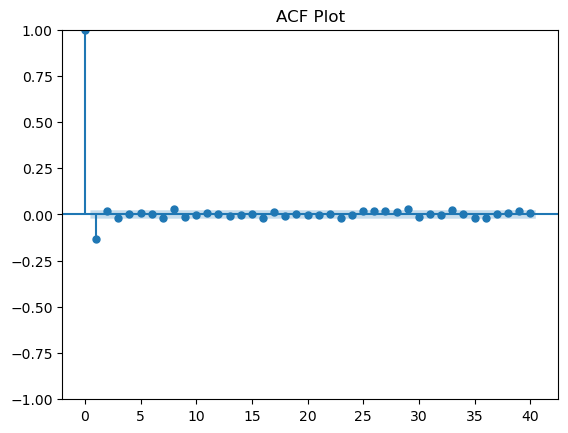

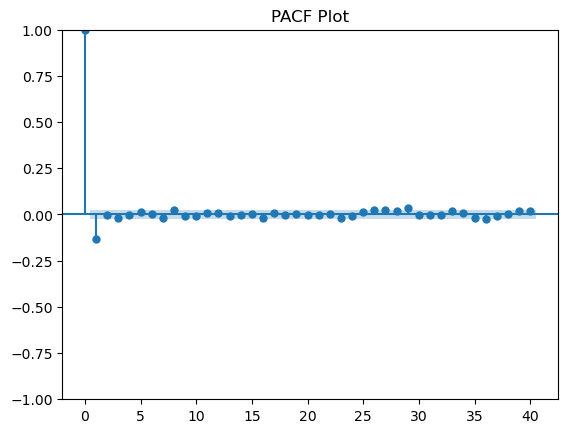

In [23]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(data_diff, lags=40, title="ACF Plot")
plot_pacf(data_diff, lags=40, title="PACF Plot")
plt.show()

In [25]:
from statsmodels.tsa.arima.model import ARIMA

# Set ARIMA parameters (adjust based on ACF/PACF analysis)
p, d, q = 1, 1, 1

# Fit ARIMA model
model_arima = ARIMA(Data['Exchange_Rate'], order=(p, d, q))
model_arima_fit = model_arima.fit()

# Print model summary
print(model_arima_fit.summary())

                               SARIMAX Results                                
Dep. Variable:          Exchange_Rate   No. Observations:                 7588
Model:                 ARIMA(1, 1, 1)   Log Likelihood               28054.161
Date:                Sat, 08 Feb 2025   AIC                         -56102.322
Time:                        15:34:53   BIC                         -56081.519
Sample:                             0   HQIC                        -56095.182
                               - 7588                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.1268      0.045     -2.797      0.005      -0.216      -0.038
ma.L1         -0.0046      0.045     -0.101      0.920      -0.094       0.085
sigma2      3.596e-05   9.94e-08    361.604      0.0

C:\Users\91755\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


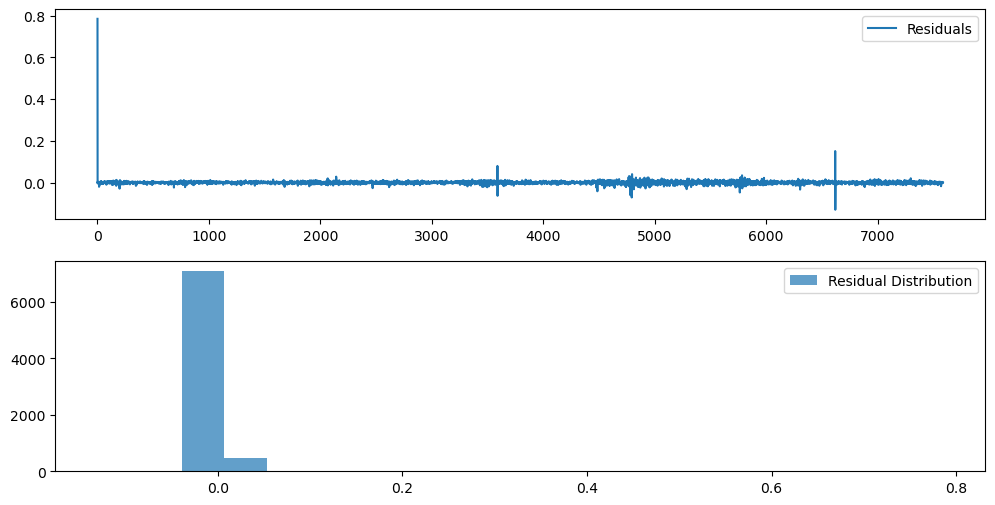

NameError: name 'Date' is not defined

<Figure size 1200x600 with 0 Axes>

In [27]:

# Residual diagnostics
residuals = model_arima_fit.resid

plt.figure(figsize=(12, 6))
plt.subplot(211)
plt.plot(residuals, label='Residuals')
plt.legend()
plt.subplot(212)
plt.hist(residuals, bins=20, label='Residual Distribution', alpha=0.7)
plt.legend()
plt.show()

# Forecast future values
forecast_arima = model_arima_fit.forecast(steps=30)

# Plot forecasts
plt.figure(figsize=(12, 6))
plt.plot(Data.index, Date['Exchange_Rate'], label='Actual Data')
plt.plot(forecast_arima.index, forecast_arima, label='ARIMA Forecast', color='orange')
plt.title('ARIMA Model Forecast')
plt.xlabel('date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()


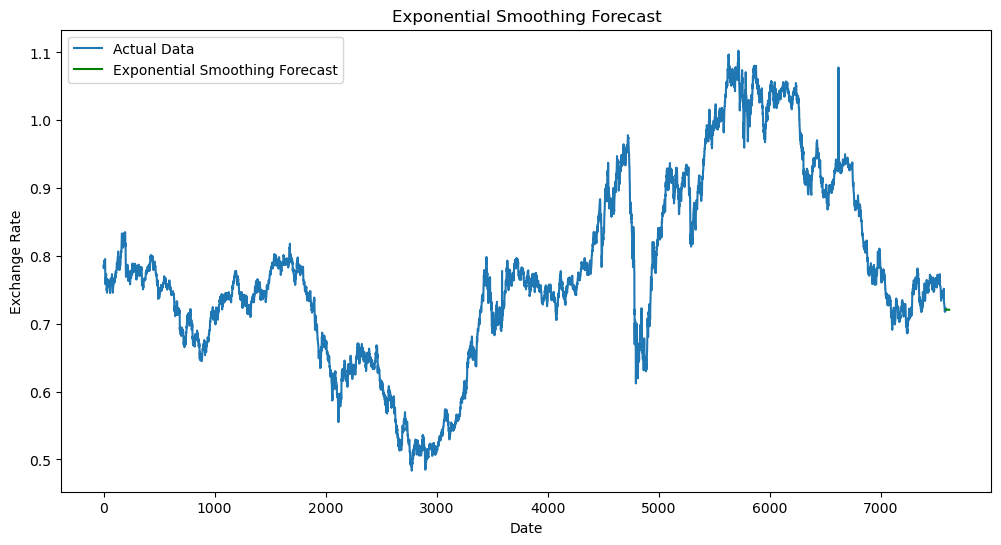

In [55]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Fit Holt-Winters model
model_es = ExponentialSmoothing(Data['Exchange_Rate'], trend='add', seasonal=None, seasonal_periods=365)
model_es_fit = model_es.fit()

# Forecast future values
forecast_es = model_es_fit.forecast(steps=30)

# Plot forecasts
plt.figure(figsize=(12, 6))
plt.plot(Data.index, Data['Exchange_Rate'], label='Actual Data')
plt.plot(forecast_es.index, forecast_es, label='Exponential Smoothing Forecast', color='green')
plt.title('Exponential Smoothing Forecast')
plt.xlabel('Date')
plt.ylabel('Exchange Rate')
plt.legend()
plt.show()


In [57]:
from sklearn.metrics import mean_absolute_error, mean_squared_error
import numpy as np

# Compute error metrics
actual = Data['Exchange_Rate'][-30:]  # Last 30 actual values (use your data split)
predicted_arima = forecast_arima[:30]
predicted_es = forecast_es[:30]

mae_arima = mean_absolute_error(actual, predicted_arima)
rmse_arima = np.sqrt(mean_squared_error(actual, predicted_arima))
mape_arima = np.mean(np.abs((actual - predicted_arima) / actual)) * 100

mae_es = mean_absolute_error(actual, predicted_es)
rmse_es = np.sqrt(mean_squared_error(actual, predicted_es))
mape_es = np.mean(np.abs((actual - predicted_es) / actual)) * 100

# Print error metrics
print(f'ARIMA - MAE: {mae_arima}, RMSE: {rmse_arima}, MAPE: {mape_arima}')
print(f'Exponential Smoothing - MAE: {mae_es}, RMSE: {rmse_es}, MAPE: {mape_es}')


ARIMA - MAE: 0.012724006489305202, RMSE: 0.016982710912755217, MAPE: nan
Exponential Smoothing - MAE: 0.012755718241735528, RMSE: 0.01700519572211454, MAPE: nan
